In [29]:
import pandas as pd
import nltk
from nltk import FreqDist
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
dislike = pd.read_excel('/Users/reggieyang/Desktop/Python/Summer Projects/NLP/dislike.xlsx')


In [31]:
column_name = dislike.columns[0]
dislike.rename({column_name:'dislike_review'},axis=1,inplace=True)


In [32]:
data_clean = dislike

In [33]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


# Let's take a look at the updated text
data_clean['dislike_review'] = data_clean['dislike_review'].apply(clean_text_round1)

<>:8: DeprecationWarning: invalid escape sequence \[
<>:10: DeprecationWarning: invalid escape sequence \w
<>:8: DeprecationWarning: invalid escape sequence \[
<>:10: DeprecationWarning: invalid escape sequence \w
<>:8: DeprecationWarning: invalid escape sequence \[
<>:10: DeprecationWarning: invalid escape sequence \w
<ipython-input-33-ebe69e897d78>:8: DeprecationWarning: invalid escape sequence \[
  text = re.sub('\[.*?\]', '', text)
<ipython-input-33-ebe69e897d78>:10: DeprecationWarning: invalid escape sequence \w
  text = re.sub('\w*\d\w*', '', text)


In [34]:
#Remove stop words
from nltk.corpus import stopwords
#nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.append('articles')
stop_words.append('article')

data_clean['reviews_without_stopwords'] = data_clean['dislike_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
data_clean.head()

,dislike_review,reviews_without_stopwords
0,articles seem to have become less technical lately,seem become less technical lately
1,it rarelynever covers topics relevant to my career,rarelynever covers topics relevant career
2,more science and science history less on personalities more news from public universities vs the elite eastwest coast private schools which dominate the newspeople highlighted in physics today is...,science science history less personalities news public universities vs elite eastwest coast private schools dominate newspeople highlighted physics today issues part public universities bulk scien...
3,i like it just fine,like fine
4,cant really think of anything,cant really think anything


In [35]:
#Lemmatize data
import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
def to_string(df):
    return ' '.join(df)

data_clean['text_lemmatized'] = data_clean.reviews_without_stopwords.apply(lemmatize_text)
data_clean['text_lemmatized'] = data_clean['text_lemmatized'].map(to_string)

data_clean.head()
data_clean.to_csv('/Users/reggieyang/Desktop/Python/Summer Projects/NLP/dataset/dislike_data_clean.csv',index=False)

In [36]:
data_clean = pd.read_csv('/Users/reggieyang/Desktop/Python/Summer Projects/NLP/dataset/dislike_data_clean.csv')
data_clean.head()

,dislike_review,reviews_without_stopwords,text_lemmatized
0,articles seem to have become less technical lately,seem become less technical lately,seem become le technical lately
1,it rarelynever covers topics relevant to my career,rarelynever covers topics relevant career,rarelynever cover topic relevant career
2,more science and science history less on personalities more news from public universities vs the elite eastwest coast private schools which dominate the newspeople highlighted in physics today is...,science science history less personalities news public universities vs elite eastwest coast private schools dominate newspeople highlighted physics today issues part public universities bulk scien...,science science history le personality news public university v elite eastwest coast private school dominate newspeople highlighted physic today issue part public university bulk science education...
3,i like it just fine,like fine,like fine
4,cant really think of anything,cant really think anything,cant really think anything


In [46]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

In [47]:
data_clean['text_lemmatized']=data_clean['text_lemmatized'].fillna('nan')

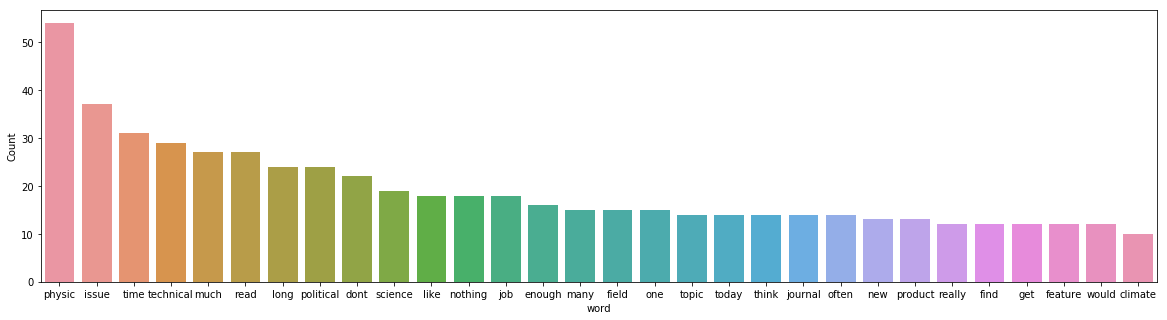

In [49]:
freq_words(data_clean['text_lemmatized'])

In [51]:
# remove stopwords from the text
reviews = [r for r in data_clean['text_lemmatized']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]


In [52]:
#!python -m spacy download en # one time run


In [53]:
nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

In [54]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['rarelynever', 'cover', 'topic', 'relevant', 'career']


In [55]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1]) # print lemmatized review

['rarelynever', 'cover', 'topic', 'relevant', 'career']


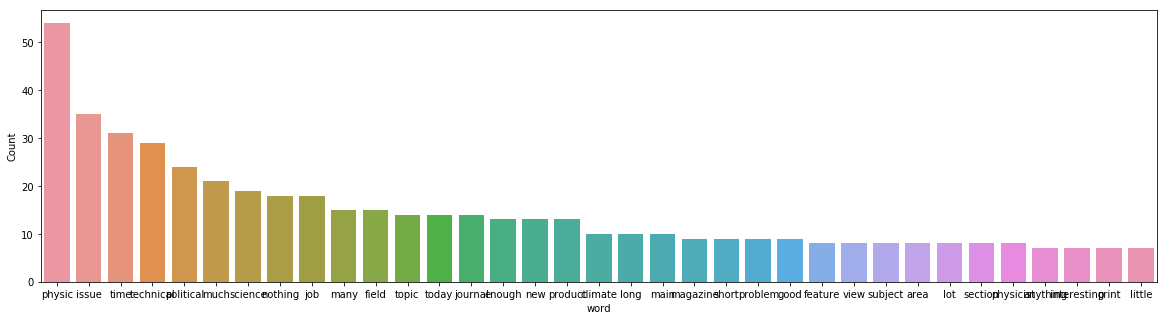

In [56]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

data_clean['text_lemmatized2'] = reviews_3

freq_words(data_clean['text_lemmatized2'], 35)

## Building an LDA model


In [57]:
dictionary = corpora.Dictionary(reviews_2)

In [58]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]


In [59]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=50)

In [60]:
lda_model.print_topics()

[(0,
  '0.020*"time" + 0.020*"magazine" + 0.020*"anything" + 0.020*"layout" + 0.013*"good" + 0.013*"lot" + 0.013*"issue" + 0.013*"reading" + 0.013*"style" + 0.013*"november"'),
 (1,
  '0.044*"time" + 0.039*"physic" + 0.037*"issue" + 0.025*"field" + 0.024*"topic" + 0.020*"technical" + 0.017*"main" + 0.014*"interested" + 0.014*"interesting" + 0.014*"climate"'),
 (2,
  '0.040*"physic" + 0.033*"today" + 0.018*"fine" + 0.015*"many" + 0.015*"science" + 0.015*"issue" + 0.015*"dislike" + 0.015*"ad" + 0.012*"political" + 0.011*"journal"'),
 (3,
  '0.073*"technical" + 0.060*"product" + 0.059*"job" + 0.049*"new" + 0.037*"section" + 0.028*"opportunity" + 0.026*"time" + 0.023*"enough" + 0.023*"long" + 0.015*"science"'),
 (4,
  '0.026*"time" + 0.020*"issue" + 0.020*"small" + 0.015*"much" + 0.015*"print" + 0.015*"reference" + 0.010*"physic" + 0.010*"material" + 0.010*"late" + 0.010*"dislike"'),
 (5,
  '0.052*"physic" + 0.043*"much" + 0.025*"science" + 0.018*"old" + 0.014*"issue" + 0.013*"outside" + 0

In [61]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

/Users/reggieyang/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.061085 -0.102020       1        1  19.449350
2     -0.091873 -0.076262       2        1  13.988275
5      0.007662 -0.090509       3        1  11.759477
4     -0.036334  0.112677       4        1   9.786321
3      0.229175  0.007070       5        1   9.734612
7     -0.034366 -0.016544       6        1   7.613349
9     -0.091796 -0.051162       7        1   7.608119
6      0.002902  0.071645       8        1   6.915254
0     -0.051835  0.067475       9        1   6.852235
8      0.005378  0.077630      10        1   6.293010, topic_info=    Category       Freq          Term      Total  loglift  logprob
30   Default  11.000000       nothing  11.000000  30.0000  30.0000
0    Default  20.000000     technical  20.000000  29.0000  29.0000
83   Default   9.000000       product   9.000000  28.0000  28.0000
18   Default  40.000000        physic  40.000000  27.0000  27.0000
80   Default  13.000000           job  13.000000  26.0000  26.0000
56   Default  23.000000          time  23.000000  25.0000  25.0000
81   Default   9.000000           new   9.000000  24.0000  24.0000
147  Default  16.000000     political  16.000000  23.0000  23.0000
133  Default   5.000000       section   5.000000  22.0000  22.0000
98   Default  15.000000          much  15.000000  21.0000  21.0000
349  Default   5.000000      obituary   5.000000  20.0000  20.0000
23   Default  11.000000         today  11.000000  19.0000  19.0000
82   Default   4.000000   opportunity   4.000000  18.0000  18.0000
129  Default   7.000000       problem   7.000000  17.0000  17.0000
215  Default   7.000000          main   7.000000  16.0000  16.0000
5    Default  11.000000         topic  11.000000  15.0000  15.0000
76   Default   6.000000         short   6.000000  14.0000  14.0000
65   Default  12.000000         field  12.000000  13.0000  13.0000
31   Default   3.000000    occasional   3.000000  12.0000  12.0000
27   Default   5.000000      anything   5.000000  11.0000  11.0000
53   Default   6.000000      magazine   6.000000  10.0000  10.0000
67   Default  11.000000          many  11.000000   9.0000   9.0000
35   Default   5.000000         small   5.000000   8.0000   8.0000
22   Default  14.000000       science  14.000000   7.0000   7.0000
50   Default   7.000000          long   7.000000   6.0000   6.0000
33   Default   5.000000           old   5.000000   5.0000   5.0000
26   Default   4.000000          fine   4.000000   4.0000   4.0000
125  Default  10.000000       journal  10.000000   3.0000   3.0000
145  Default   3.000000          bias   3.000000   2.0000   2.0000
46   Default   5.000000        little   5.000000   1.0000   1.0000
..       ...        ...           ...        ...      ...      ...
559  Topic10   0.651584       decline   1.283311   2.0879  -4.9712
207  Topic10   1.244049      emphasis   3.292791   1.7924  -4.3244
76   Topic10   2.428835         short   6.667032   1.7560  -3.6554
163  Topic10   0.651623         stick   1.933697   1.6780  -4.9711
259  Topic10   0.651629           day   1.945429   1.6720  -4.9711
126  Topic10   0.651618          math   1.958948   1.6650  -4.9711
311  Topic10   0.651613     complaint   1.958942   1.6650  -4.9711
386  Topic10   0.651611     diversity   1.958945   1.6650  -4.9711
182  Topic10   0.651626          want   1.983728   1.6525  -4.9711
41   Topic10   0.651627    discussion   2.033122   1.6279  -4.9711
16   Topic10   0.651625          part   2.033123   1.6279  -4.9711
508  Topic10   0.651638        policy   2.039435   1.6248  -4.9711
110  Topic10   0.651626  significance   2.039449   1.6248  -4.9711
147  Topic10   5.267563     political  16.785183   1.6068  -2.8812
111  Topic10   0.651632    sufficient   2.076512   1.6068  -4.9711
176  Topic10   0.651624         great   2.650993   1.3625  -4.9711
215  Topic10   1.717605          main   7.916293   1.2377  -4.0019
46   Topic10   1.244053   

In [62]:
lda_model

In [63]:
corpus_transformed = lda_model[doc_term_matrix]


In [64]:
from operator import itemgetter
score_list = []
for topic in corpus_transformed:
        score_list.append(max(topic,key=itemgetter(1)))

In [65]:
data_clean['topic_score'] = score_list

In [66]:
data_clean

,dislike_review,reviews_without_stopwords,text_lemmatized,text_lemmatized2,topic_score
0,articles seem to have become less technical lately,seem become less technical lately,seem become le technical lately,technical,"(3, 0.549984)"
1,it rarelynever covers topics relevant to my career,rarelynever covers topics relevant career,rarelynever cover topic relevant career,rarelynever cover topic relevant career,"(3, 0.84999096)"
2,more science and science history less on personalities more news from public universities vs the elite eastwest coast private schools which dominate the newspeople highlighted in physics today is...,science science history less personalities news public universities vs elite eastwest coast private schools dominate newspeople highlighted physics today issues part public universities bulk scien...,science science history le personality news public university v elite eastwest coast private school dominate newspeople highlighted physic today issue part public university bulk science education...,science science history personality news public university v eastw coast private school dominate physic today issue part public university bulk science education halo effect,"(5, 0.96399754)"
3,i like it just fine,like fine,like fine,fine,"(2, 0.54999626)"
4,cant really think of anything,cant really think anything,cant really think anything,anything,"(0, 0.5499789)"
5,not much i really enjoy physics today,much really enjoy physics today,much really enjoy physic today,physic today,"(2, 0.6999679)"
6,some articles are just too long,long,long,,"(0, 0.1)"
7,there are a few articles i really enjoy but not the rest,really enjoy rest,really enjoy rest,rest,"(4, 0.5499801)"
8,nothing really there is an occasional issue that i dont find particularly interesting,nothing really occasional issue dont find particularly interesting,nothing really occasional issue dont find particularly interesting,nothing occasional issue interesting,"(8, 0.819978)"
9,print too small as i get older also i feel like women are rarely seen or written about in the articles,print small get older also feel like women rarely seen written,print small get older also feel like woman rarely seen written,print small get old woman,"(4, 0.8499893)"


In [67]:
#count each topic
def extract_topic(df):
    if df[1]<0.6:
        return 10
    else:
        return df[0]
data_clean['topic'] = data_clean['topic_score'].apply(extract_topic)

#add column with topic content
def add_content(df):
    if df==10:
        return 'Others'
    else:
        return lda_model.print_topics()[int(df)]
data_clean['topic_content'] = data_clean['topic'].apply(add_content)

In [69]:
data_clean

,dislike_review,reviews_without_stopwords,text_lemmatized,text_lemmatized2,topic_score,topic,topic_content
0,articles seem to have become less technical lately,seem become less technical lately,seem become le technical lately,technical,"(3, 0.549984)",10,Others
1,it rarelynever covers topics relevant to my career,rarelynever covers topics relevant career,rarelynever cover topic relevant career,rarelynever cover topic relevant career,"(3, 0.84999096)",3,"(3, 0.073*""technical"" + 0.060*""product"" + 0.059*""job"" + 0.049*""new"" + 0.037*""section"" + 0.028*""opportunity"" + 0.026*""time"" + 0.023*""enough"" + 0.023*""long"" + 0.015*""science"")"
2,more science and science history less on personalities more news from public universities vs the elite eastwest coast private schools which dominate the newspeople highlighted in physics today is...,science science history less personalities news public universities vs elite eastwest coast private schools dominate newspeople highlighted physics today issues part public universities bulk scien...,science science history le personality news public university v elite eastwest coast private school dominate newspeople highlighted physic today issue part public university bulk science education...,science science history personality news public university v eastw coast private school dominate physic today issue part public university bulk science education halo effect,"(5, 0.96399754)",5,"(5, 0.052*""physic"" + 0.043*""much"" + 0.025*""science"" + 0.018*""old"" + 0.014*""issue"" + 0.013*""outside"" + 0.013*""education"" + 0.013*""little"" + 0.013*""way"" + 0.013*""scientist"")"
3,i like it just fine,like fine,like fine,fine,"(2, 0.54999626)",10,Others
4,cant really think of anything,cant really think anything,cant really think anything,anything,"(0, 0.5499789)",10,Others
5,not much i really enjoy physics today,much really enjoy physics today,much really enjoy physic today,physic today,"(2, 0.6999679)",2,"(2, 0.040*""physic"" + 0.033*""today"" + 0.018*""fine"" + 0.015*""many"" + 0.015*""science"" + 0.015*""issue"" + 0.015*""dislike"" + 0.015*""ad"" + 0.012*""political"" + 0.011*""journal"")"
6,some articles are just too long,long,long,,"(0, 0.1)",10,Others
7,there are a few articles i really enjoy but not the rest,really enjoy rest,really enjoy rest,rest,"(4, 0.5499801)",10,Others
8,nothing really there is an occasional issue that i dont find particularly interesting,nothing really occasional issue dont find particularly interesting,nothing really occasional issue dont find particularly interesting,nothing occasional issue interesting,"(8, 0.819978)",8,"(8, 0.114*""nothing"" + 0.056*""political"" + 0.026*""short"" + 0.026*""occasional"" + 0.025*""technical"" + 0.020*""issue"" + 0.020*""bias"" + 0.020*""advertisement"" + 0.018*""main"" + 0.013*""little"")"
9,print too small as i get older also i feel like women are rarely seen or written about in the articles,print small get older also feel like women rarely seen written,print small get older also feel like woman rarely seen written,print small get old woman,"(4, 0.8499893)",4,"(4, 0.026*""time"" + 0.020*""issue"" + 0.020*""small"" + 0.015*""much"" + 0.015*""print"" + 0.015*""reference"" + 0.010*""physic"" + 0.010*""material"" + 0.010*""late"" + 0.010*""dislike"")"


In [71]:
final_dislike_data = data_clean[['dislike_review','topic_score','topic','topic_content']]
final_dislike_data

,dislike_review,topic_score,topic,topic_content
0,articles seem to have become less technical lately,"(3, 0.549984)",10,Others
1,it rarelynever covers topics relevant to my career,"(3, 0.84999096)",3,"(3, 0.073*""technical"" + 0.060*""product"" + 0.059*""job"" + 0.049*""new"" + 0.037*""section"" + 0.028*""opportunity"" + 0.026*""time"" + 0.023*""enough"" + 0.023*""long"" + 0.015*""science"")"
2,more science and science history less on personalities more news from public universities vs the elite eastwest coast private schools which dominate the newspeople highlighted in physics today is...,"(5, 0.96399754)",5,"(5, 0.052*""physic"" + 0.043*""much"" + 0.025*""science"" + 0.018*""old"" + 0.014*""issue"" + 0.013*""outside"" + 0.013*""education"" + 0.013*""little"" + 0.013*""way"" + 0.013*""scientist"")"
3,i like it just fine,"(2, 0.54999626)",10,Others
4,cant really think of anything,"(0, 0.5499789)",10,Others
5,not much i really enjoy physics today,"(2, 0.6999679)",2,"(2, 0.040*""physic"" + 0.033*""today"" + 0.018*""fine"" + 0.015*""many"" + 0.015*""science"" + 0.015*""issue"" + 0.015*""dislike"" + 0.015*""ad"" + 0.012*""political"" + 0.011*""journal"")"
6,some articles are just too long,"(0, 0.1)",10,Others
7,there are a few articles i really enjoy but not the rest,"(4, 0.5499801)",10,Others
8,nothing really there is an occasional issue that i dont find particularly interesting,"(8, 0.819978)",8,"(8, 0.114*""nothing"" + 0.056*""political"" + 0.026*""short"" + 0.026*""occasional"" + 0.025*""technical"" + 0.020*""issue"" + 0.020*""bias"" + 0.020*""advertisement"" + 0.018*""main"" + 0.013*""little"")"
9,print too small as i get older also i feel like women are rarely seen or written about in the articles,"(4, 0.8499893)",4,"(4, 0.026*""time"" + 0.020*""issue"" + 0.020*""small"" + 0.015*""much"" + 0.015*""print"" + 0.015*""reference"" + 0.010*""physic"" + 0.010*""material"" + 0.010*""late"" + 0.010*""dislike"")"


In [72]:
final_dislike_data['topic'].value_counts()

10    101
1      36
3      32
2      25
4      24
5      20
9      17
8      16
0      14
7      12
6      10
Name: topic, dtype: int64

In [73]:
final_dislike_data.to_excel('/Users/reggieyang/Desktop/Python/Summer Projects/NLP/final report/dislike_result.xlsx')